In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('shopify.csv')

In [3]:
print("Shape:", df.shape)
print('Types:')
print(df.dtypes)
df.head()

Shape: (5000, 7)
Types:
order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [5]:
len(df['shop_id'].unique())

100

In [6]:
df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
len(df['created_at'].dt.month.unique())

1

In [7]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [8]:
df.corr()

,order_id,shop_id,user_id,order_amount,total_items
order_id,1.000000,-0.005967,0.002881,-0.005565,-0.006768
shop_id,-0.005967,1.000000,0.009033,-0.005559,-0.016304
user_id,0.002881,0.009033,1.000000,-0.158104,-0.161247
order_amount,-0.005565,-0.005559,-0.158104,1.000000,0.991747
total_items,-0.006768,-0.016304,-0.161247,0.991747,1.000000


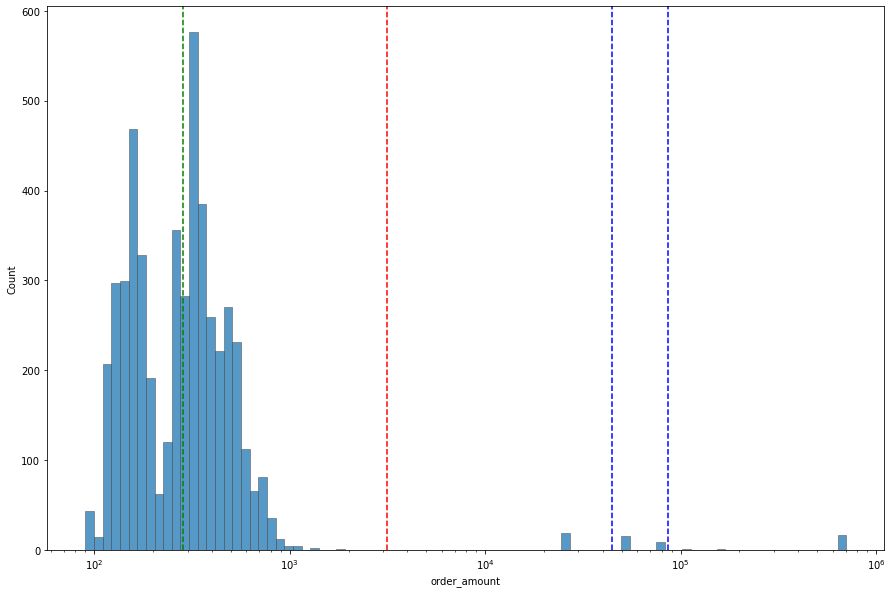

In [9]:
plt.figure(figsize=(15, 10))
sns.histplot(df['order_amount'], log_scale=True, kde=False, edgecolor=".3", linewidth=.5)
mean=df['order_amount'].mean()
median=df['order_amount'].median()
std=df['order_amount'].std()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='--')
plt.axvline(mean+2*std, color='b', linestyle='--')
plt.axvline(mean+std, color='b', linestyle='--')

In [10]:
df['order_amount'].mean()

3145.128

## The reason is that the data has outliers, that's why average order value is too high. We can handle the outliers in a few ways.

### There are a couple we can use towards this data:

#### 1. Remove the outliers

In [11]:
df_no_outliers = df[df['order_amount'] < (10**3)]

In [12]:
df_no_outliers.order_amount.mean()

301.06431324812337

#### 1.Take median value instead of mean

In [13]:
df['order_amount'].median()

284.0

#### 3. Get the data points up to nth Percentile

In [14]:
percentile_97 = df['order_amount'].quantile(.97, interpolation='higher')
percentile_97

712

In [15]:
no_outlier_percentile = df[df['order_amount'] <= percentile_97]

In [16]:
no_outlier_percentile['order_amount'].mean()

293.27070457354756

#### 4. Get the data points within interquartile range

In [17]:
q1 = df['order_amount'].quantile(0.25)
q3 = df['order_amount'].quantile(0.75)
q1, q3

(163.0, 390.0)

In [18]:
iqr = q3-q1
iqr

227.0

In [19]:
upper_limit = q3 + 1.5*iqr
upper_limit

730.5

In [20]:
df[(df['order_amount']<=upper_limit)]['order_amount'].mean()

293.7153735336489

### In my opinion, the interquartile range is better way to evaluate this data.

#### I think the metrics I would report is the average value per each store for this dataset. It explains the revenue numbers per each store per month and it shows the stores with the outliers, so we can explore them more. Also we can compare the stores' revenue with the historical data and see if numbers increased or decreased with the previous time periods. Based on that we can use other techniques in order to increase the revenue.

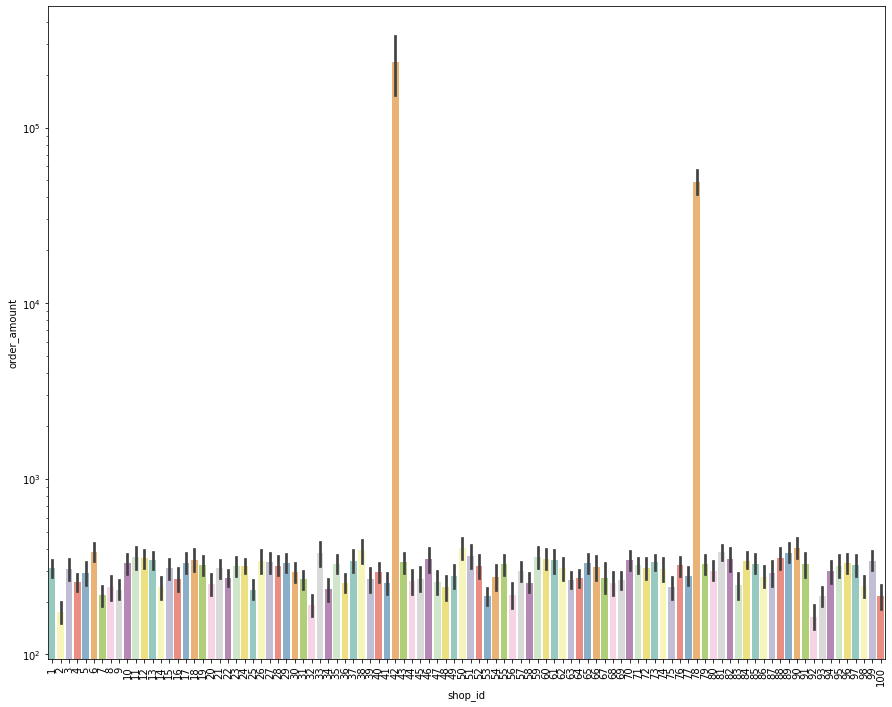

In [21]:
plt.figure(figsize=(15, 12))
sns.barplot(x="shop_id", y="order_amount", data=df, palette="Set3")
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

In [22]:
# get mean, min, max per store
stores = df.groupby(['shop_id']).agg({'order_amount': ['mean', 'min', 'max']})

In [23]:
stores

order_amount               
                  mean    min     max
shop_id                              
1           308.818182    158     632
2           174.327273     94     470
3           305.250000    148     592
4           258.509804    128     512
5           290.311111    142     710
6           383.508475    187     935
7           218.000000    112     560
8           241.043478    132     660
9           234.000000    118     590
10          332.301887    148     740
11          356.734694    184     920
12          352.698113    201     804
13          345.396825    160     960
14          242.000000    116     580
15          308.942308    153     765
16          270.146341    156     780
17          332.075472    176     704
18          342.588235    156     780
19          320.906250    163     815
20          251.557692    127     508
21          308.695652    142     710
22          273.750000    146     584
23          317.672727    156     780
24          320.727273    140     560
25          232.916667    130     520
26          341.224490    176     880
27          334.870370    169     845
28          320.372093    164     656
29          331.620690    163     815
30          295.071429    153     612
31          268.978723    129     516
32          189.976190    101     404
33          376.275000    173     865
34          234.240000    122     488
35          328.000000    164     656
36          254.800000    130     650
37          340.208333    142     710
38          390.857143    190     760
39          268.000000    134     670
40          295.166667    161     644
41          254.000000    118     590
42       235101.490196    352  704000
43          333.913793    181    1086
44          262.153846    144     576
45          269.310345    142     710
46          347.441860    166     830
47          259.148936    145     725
48          242.775000    117     468
49          279.905660    129     645
50          403.545455    193     965
51          361.804348    187     935
52          316.926829    146     730
53          214.117647    112     560
54          276.640000    133    1064
55          327.750000    171     684
56          218.189189    117     468
57          296.773585    147     735
58          254.949153    138     552
59          358.966667    178     712
60          350.234043    177     885
61          344.440000    158     948
62          308.837209    160     640
63          264.965517    136     544
64          272.186047    133     399
65          330.814815    154     616
66          312.886792    161     805
67          272.621622    131     786
68          254.638298    136     816
69          264.183333    131     655
70          343.067797    173     865
71          323.030303    164     656
72          309.565217    160     640
73          335.689655    165     660
74          306.000000    153     765
75          240.761905    128     512
76          321.071429    155     620
77          280.800000    156     624
78        49213.043478  25725  154350
79          328.481481    181     724
80          299.666667    145     580
81          384.000000    177     708
82          349.785714    177     885
83          248.785714    129     774
84          342.305085    153     765
85          329.257143    172     516
86          277.500000    130     780
87          292.269231    149     745
88          355.520000    176     880
89          379.147541    196     980
90          403.224490    178     890
91          325.925926    160     960
92          162.857143     90     450
93          214.474576    114     456
94          297.777778    134     670
95          318.769231    168     672
96          330.000000    153     765
97          324.000000    162     810
98          245.362069    133     532
99          339.444444    195     780
100         213.675000    111     444